In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import joblib
import seaborn as sns


: 

In [180]:
#loading data
accident_df = pd.read_csv ('/content/drive/MyDrive/dr/Road Accident Data.csv')

In [181]:
#return random rows on the dataset
accident_df.sample(5)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
192748,201004FB10015,3/29/2022,Monday,Data missing or out of range,Not at junction or within 20 metres,Slight,53.793527,Daylight,Burnley,NaN,...,1,2,Lancashire,Wet or damp,NaN,30,15:15,Urban,Fine no high winds,Car
166000,201001CW11891,9/8/2022,Wednesday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.497159,Darkness - lights unlit,Westminster,NaN,...,1,2,Metropolitan Police,Wet or damp,Single carriageway,30,19:35,Urban,Raining no high winds,Car
184419,201001XH30344,5/19/2022,Wednesday,Give way or uncontrolled,Slip road,Slight,51.559402,Daylight,Hillingdon,NaN,...,1,2,Metropolitan Police,Dry,Dual carriageway,70,16:37,Rural,Fine no high winds,Motorcycle 125cc and under
198285,201006F037770,10/3/2022,Sunday,Auto traffic signal,More than 4 arms (not roundabout),Slight,53.523803,Daylight,Salford,NaN,...,1,2,Greater Manchester,Dry,Dual carriageway,30,16:30,Urban,Fine no high winds,Car
148977,2.01E+12,7/2/2021,Thursday,Give way or uncontrolled,T or staggered junction,Slight,51.516147,Daylight,Bridgend,NaN,...,1,2,South Wales,Dry,Single carriageway,30,8:20,Rural,Fine no high winds,Motorcycle over 125cc and up to 500cc


In [182]:
accident_df.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [183]:
#checking for null values
accident_df.isnull().sum()

,0
Accident_Index,0
Accident Date,0
Day_of_Week,0
Junction_Control,0
Junction_Detail,0
Accident_Severity,0
Latitude,0
Light_Conditions,0
Local_Authority_(District),0
Carriageway_Hazards,302549


In [184]:
#handling null values which we woulnt use
accident_df = accident_df.dropna()

In [185]:
#check for duplicates rows
accident_df.duplicated()

,0
195,False
414,False
476,False
854,False
889,False
...,...
307902,False
307911,False
307918,False
307960,False


In [186]:
#check the shape
accident_df.shape

(5305, 21)

In [187]:
#check the datatype
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5305 entries, 195 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Accident_Index              5305 non-null   object 
 1   Accident Date               5305 non-null   object 
 2   Day_of_Week                 5305 non-null   object 
 3   Junction_Control            5305 non-null   object 
 4   Junction_Detail             5305 non-null   object 
 5   Accident_Severity           5305 non-null   object 
 6   Latitude                    5305 non-null   float64
 7   Light_Conditions            5305 non-null   object 
 8   Local_Authority_(District)  5305 non-null   object 
 9   Carriageway_Hazards         5305 non-null   object 
 10  Longitude                   5305 non-null   float64
 11  Number_of_Casualties        5305 non-null   int64  
 12  Number_of_Vehicles          5305 non-null   int64  
 13  Police_Force                5305 n

In [188]:
#preprocessing the data
columns_to_be_droped = ['Carriageway_Hazards','Time','Urban_or_Rural_Area','Accident Date','Accident_Index','Day_of_Week']
accident_df =accident_df = accident_df.drop(columns=columns_to_be_droped, axis=1)


In [189]:
#check the unique values in each column
for column in accident_df.select_dtypes(include='object'):
  print(column)
  print(accident_df[column].unique())


Junction_Control
['Give way or uncontrolled' 'Auto traffic signal'
 'Data missing or out of range' 'Authorised person'
 'Not at junction or within 20 metres' 'Stop sign' 'Auto traffic sigl']
Junction_Detail
['T or staggered junction' 'Crossroads'
 'Not at junction or within 20 metres' 'More than 4 arms (not roundabout)'
 'Private drive or entrance' 'Slip road' 'Roundabout' 'Mini-roundabout'
 'Other junction']
Accident_Severity
['Slight' 'Serious' 'Fatal']
Light_Conditions
['Daylight' 'Darkness - lights lit' 'Darkness - no lighting'
 'Darkness - lighting unknown' 'Darkness - lights unlit']
Local_Authority_(District)
['Kensington and Chelsea' 'City of London' 'Camden' 'Westminster'
 'Islington' 'Hammersmith and Fulham' 'Hackney' 'Tower Hamlets'
 'Waltham Forest' 'Redbridge' 'Havering' 'Newham' 'Barking and Dagenham'
 'Lambeth' 'Southwark' 'Lewisham' 'Bromley' 'Harrow' 'Greenwich' 'Bexley'
 'Barnet' 'Croydon' 'Richmond upon Thames' 'Hounslow'
 'Kingston upon Thames' 'Merton' 'Wandsworth' 

In [190]:
#converting object data types to numerical values
#converting object data types to numerical values
accident_df['Accident_Severity'] = accident_df['Accident_Severity'].map({'Slight':0,'Serious':1,'Fatal':2}).astype(float)
# Convert to category first
accident_df['Local_Authority_(District)'] = accident_df['Local_Authority_(District)'].astype('category').cat.codes.astype('category')
accident_df['Police_Force'] = accident_df['Police_Force'].astype('category').cat.codes.astype('category')
accident_df['Vehicle_Type'] = accident_df['Vehicle_Type'].astype('category').cat.codes.astype('category')
accident_df['Junction_Detail'] = accident_df['Junction_Detail'].astype('category').cat.codes.astype('category')
#using lableble encorder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
accident_df['Road_Surface_Conditions']= label_encoder.fit_transform(accident_df['Road_Surface_Conditions'])
accident_df['Light_Conditions']= label_encoder.fit_transform(accident_df['Light_Conditions'])
accident_df['Weather_Conditions']= label_encoder.fit_transform(accident_df['Weather_Conditions'])
accident_df['Road_Type']= label_encoder.fit_transform(accident_df['Road_Type'])
accident_df['Junction_Control']= label_encoder.fit_transform(accident_df['Junction_Control'])

In [191]:
#check dataset info data types
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5305 entries, 195 to 307972
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Junction_Control            5305 non-null   int64   
 1   Junction_Detail             5305 non-null   category
 2   Accident_Severity           5305 non-null   float64 
 3   Latitude                    5305 non-null   float64 
 4   Light_Conditions            5305 non-null   int64   
 5   Local_Authority_(District)  5305 non-null   category
 6   Longitude                   5305 non-null   float64 
 7   Number_of_Casualties        5305 non-null   int64   
 8   Number_of_Vehicles          5305 non-null   int64   
 9   Police_Force                5305 non-null   category
 10  Road_Surface_Conditions     5305 non-null   int64   
 11  Road_Type                   5305 non-null   int64   
 12  Speed_limit                 5305 non-null   int64   
 13  Weather_Conditions 

In [192]:
#checking corelation
accident_df.corr()

,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Weather_Conditions,Vehicle_Type
Junction_Control,1.000000,0.229091,0.027955,-0.147928,0.029194,-0.001518,-0.003575,0.006311,0.026131,-0.146481,-0.017756,0.030402,-0.017901,-0.017773,0.007251
Junction_Detail,0.229091,1.000000,-0.012471,-0.024779,-0.030491,-0.014870,0.031918,-0.038681,-0.019744,0.008198,-0.039550,0.097709,-0.215001,-0.001659,-0.007858
Accident_Severity,0.027955,-0.012471,1.000000,0.032679,-0.019608,-0.007102,0.010478,0.099568,0.014946,-0.001494,-0.008827,-0.006259,0.081696,-0.014370,0.007201
Latitude,-0.147928,-0.024779,0.032679,1.000000,0.017886,-0.133860,-0.377369,-0.005329,-0.032662,0.019984,0.043813,0.031755,0.042549,0.022680,0.003389
Light_Conditions,0.029194,-0.030491,-0.019608,0.017886,1.000000,0.017226,-0.049897,-0.005971,0.059736,-0.038509,-0.161419,0.044286,0.092747,-0.112384,-0.001629
Local_Authority_(District),-0.001518,-0.014870,-0.007102,-0.133860,0.017226,1.000000,0.013157,0.013273,-0.011333,0.169998,-0.004247,-0.007954,0.023745,0.002395,0.001156
Longitude,-0.003575,0.031918,0.010478,-0.377369,-0.049897,0.013157,1.000000,-0.017697,0.006190,0.111497,-0.020613,-0.011503,-0.018293,-0.015185,-0.011367
Number_of_Casualties,0.006311,-0.038681,0.099568,-0.005329,-0.005971,0.013273,-0.017697,1.000000,0.290711,-0.014055,0.045707,-0.108939,0.122440,0.017377,-0.006498
Number_of_Vehicles,0.026131,-0.019744,0.014946,-0.032662,0.059736,-0.011333,0.006190,0.290711,1.000000,-0.010898,0.057334,-0.256294,0.168044,0.072076,-0.015519
Police_Force,-0.146481,0.008198,-0.001494,0.019984,-0.038509,0.169998,0.111497,-0.014055,-0.010898,1.000000,0.023062,-0.020164,-0.029739,-0.001910,-0.003992


In [193]:
#spliting data into features and targets
X = accident_df.drop('Accident_Severity',axis=1)
y = accident_df['Accident_Severity']

In [194]:
#corelation of x
X.corr()

,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Weather_Conditions,Vehicle_Type
Junction_Control,1.000000,0.229091,-0.147928,0.029194,-0.001518,-0.003575,0.006311,0.026131,-0.146481,-0.017756,0.030402,-0.017901,-0.017773,0.007251
Junction_Detail,0.229091,1.000000,-0.024779,-0.030491,-0.014870,0.031918,-0.038681,-0.019744,0.008198,-0.039550,0.097709,-0.215001,-0.001659,-0.007858
Latitude,-0.147928,-0.024779,1.000000,0.017886,-0.133860,-0.377369,-0.005329,-0.032662,0.019984,0.043813,0.031755,0.042549,0.022680,0.003389
Light_Conditions,0.029194,-0.030491,0.017886,1.000000,0.017226,-0.049897,-0.005971,0.059736,-0.038509,-0.161419,0.044286,0.092747,-0.112384,-0.001629
Local_Authority_(District),-0.001518,-0.014870,-0.133860,0.017226,1.000000,0.013157,0.013273,-0.011333,0.169998,-0.004247,-0.007954,0.023745,0.002395,0.001156
Longitude,-0.003575,0.031918,-0.377369,-0.049897,0.013157,1.000000,-0.017697,0.006190,0.111497,-0.020613,-0.011503,-0.018293,-0.015185,-0.011367
Number_of_Casualties,0.006311,-0.038681,-0.005329,-0.005971,0.013273,-0.017697,1.000000,0.290711,-0.014055,0.045707,-0.108939,0.122440,0.017377,-0.006498
Number_of_Vehicles,0.026131,-0.019744,-0.032662,0.059736,-0.011333,0.006190,0.290711,1.000000,-0.010898,0.057334,-0.256294,0.168044,0.072076,-0.015519
Police_Force,-0.146481,0.008198,0.019984,-0.038509,0.169998,0.111497,-0.014055,-0.010898,1.000000,0.023062,-0.020164,-0.029739,-0.001910,-0.003992
Road_Surface_Conditions,-0.017756,-0.039550,0.043813,-0.161419,-0.004247,-0.020613,0.045707,0.057334,0.023062,1.000000,-0.009195,0.091729,0.573759,0.012019


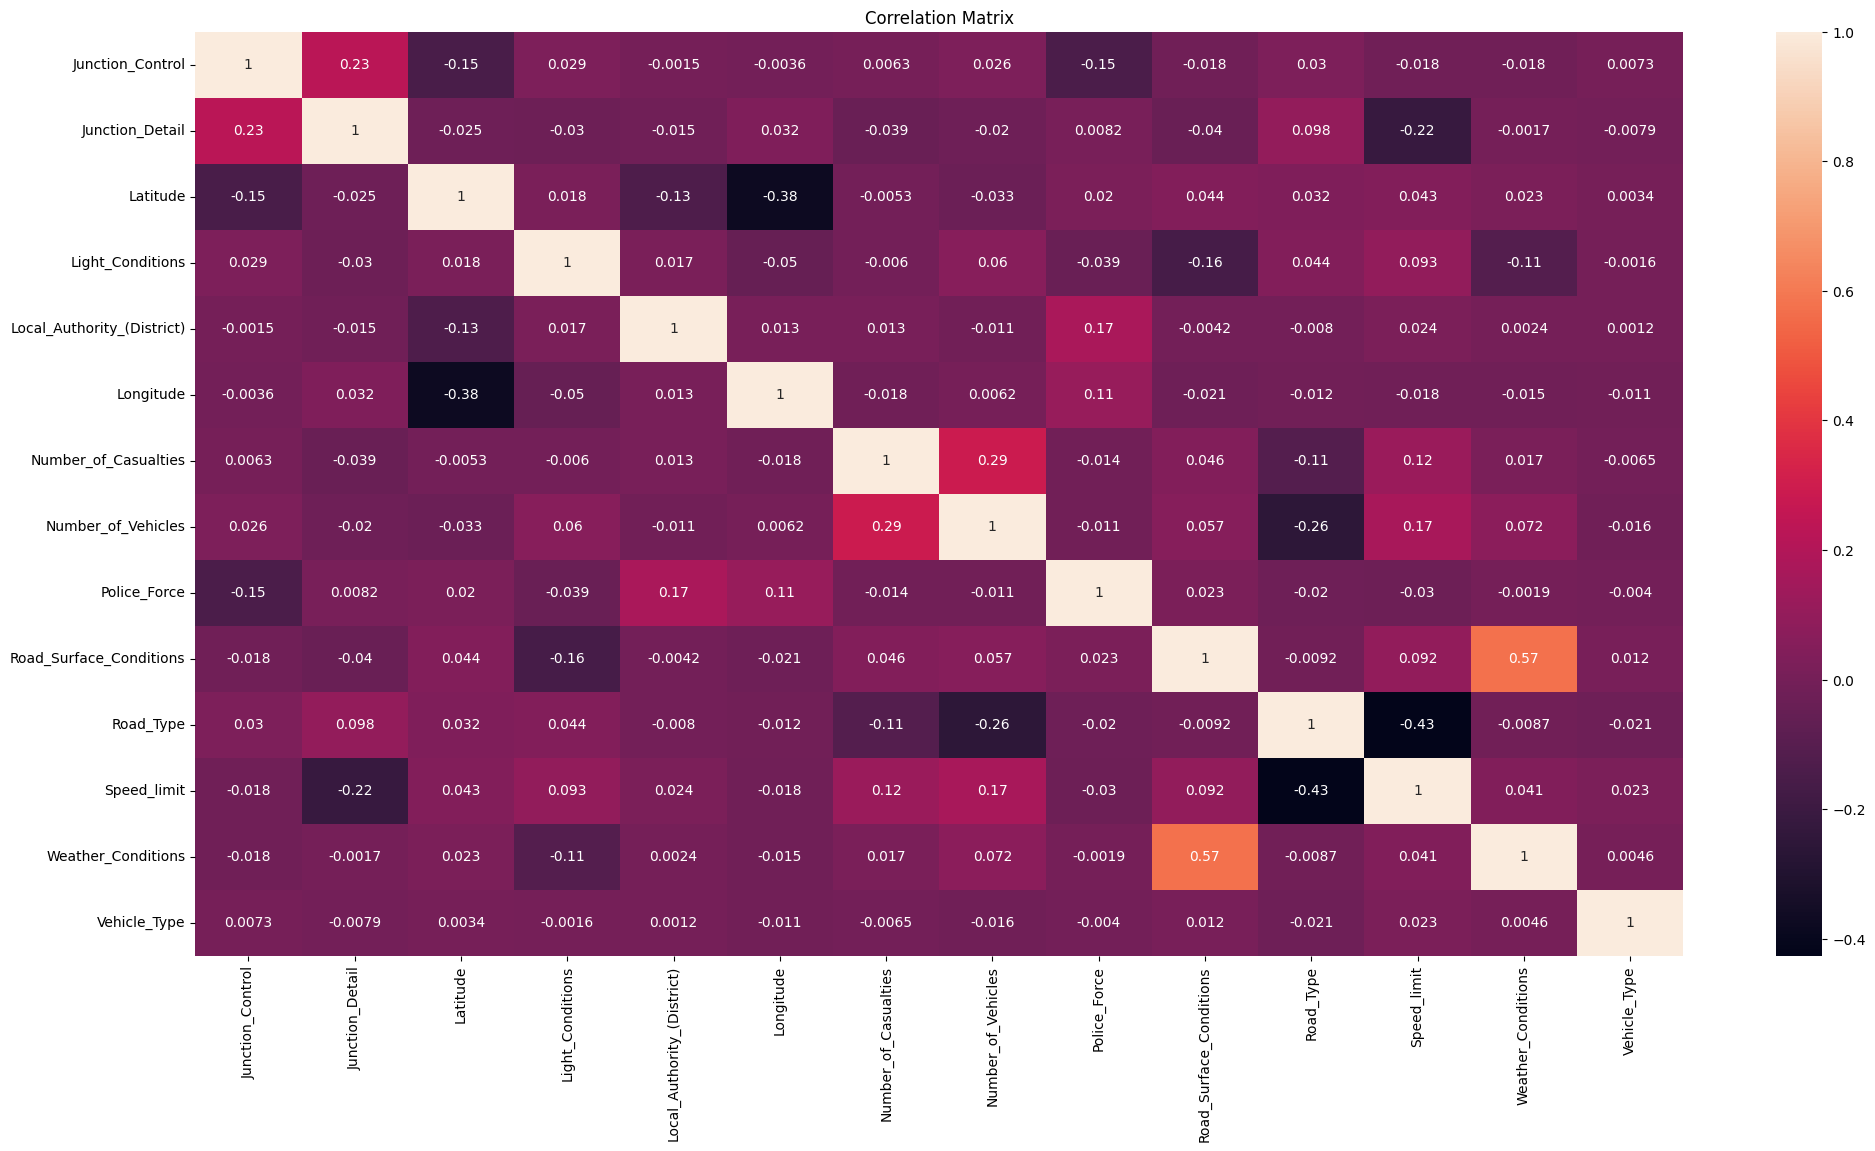

In [196]:
#visualizing the relationships
#specify the figure size using plt
plt.figure(figsize=(24,12))
#giving title
plt.title('Correlation Matrix')
sns.heatmap(X.corr(),annot=True)
#plotting
plt.show()

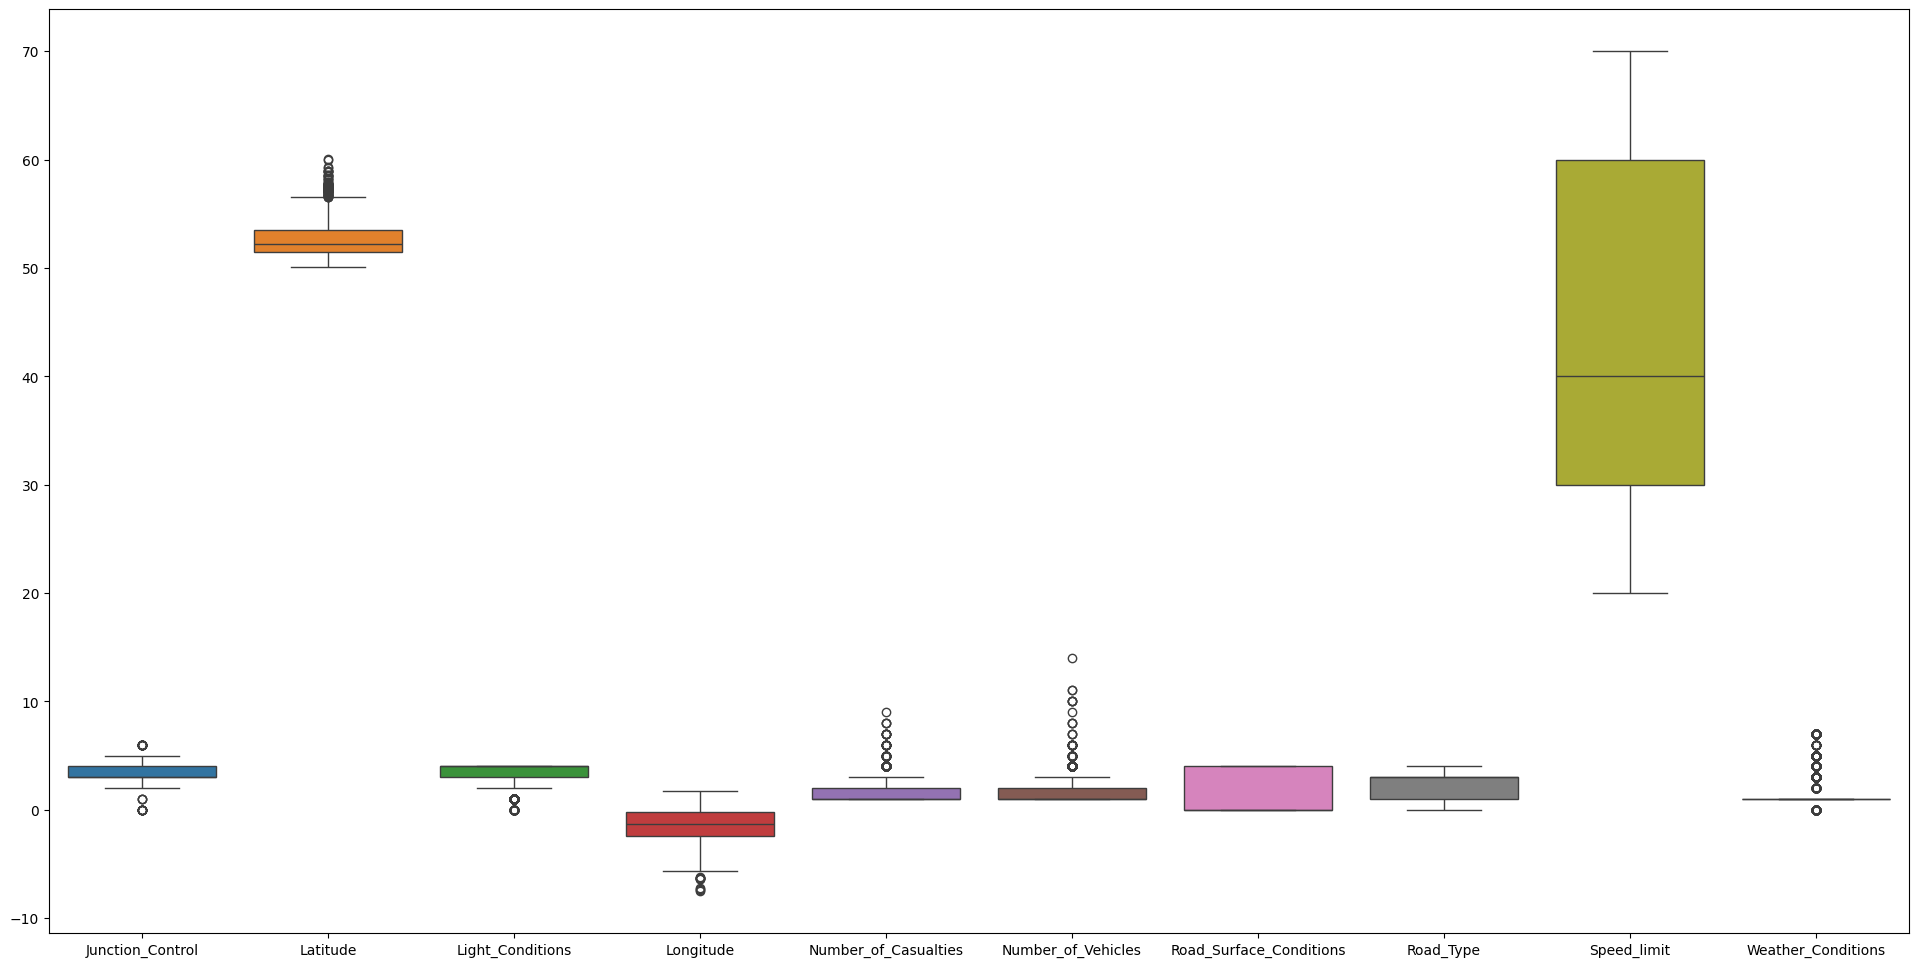

In [ ]:
#checking for outlier using box plot
plt.figure(figsize=(24,12))
sns.boxplot(X)
plt.show()

In [ ]:
#spliting the data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#create a regressor instance
regressor = LinearRegression()

In [ ]:
#fit the regressor with traing data
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
#evaluating the acuracy using mean squared error
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Mean Squared Error: 0.16384944019954575


In [ ]:
#saving the model
joblib.dump(regressor,'accident_severity_predictor.joblib')

['accident_severity_predictor.joblib']

In [ ]:
#loading the model
loaded_model = joblib.load('accident_severity_predictor.joblib')

In [ ]:
def preprocess_input(accident_df):
  # Impute missing values instead of dropping rows
  # Check if the column has any non-NaN values before calculating mode
  if accident_df['Carriageway_Hazards'].notna().any():
    accident_df['Carriageway_Hazards'] = accident_df['Carriageway_Hazards'].fillna(accident_df['Carriageway_Hazards'].mode()[0])  # Fill with mode if non-NaN values exist
  else:
    accident_df['Carriageway_Hazards'] = accident_df['Carriageway_Hazards'].fillna('Unknown')  # Fill with a default value if all values are NaN

  # accident_df = accident_df.dropna() # Remove this line or comment it
  columns_to_be_droped = ['Carriageway_Hazards','Time','Urban_or_Rural_Area','Accident Date','Accident_Index','Day_of_Week']
  accident_df =accident_df = accident_df.drop(columns=columns_to_be_droped, axis=1)
  accident_df['Local_Authority_(District)'] = accident_df['Local_Authority_(District)'].astype('category').cat.codes.astype('category')
  accident_df['Police_Force'] = accident_df['Police_Force'].astype('category').cat.codes.astype('category')
  accident_df['Vehicle_Type'] = accident_df['Vehicle_Type'].astype('category').cat.codes.astype('category')
  accident_df['Junction_Detail'] = accident_df['Junction_Detail'].astype('category').cat.codes.astype('category') # Convert to category codes
  # Initialize LabelEncoder once outside the function
  from sklearn.preprocessing import LabelEncoder
  label_encoder = LabelEncoder()
  accident_df['Road_Surface_Conditions']= label_encoder.fit_transform(accident_df['Road_Surface_Conditions'])
  accident_df['Light_Conditions']= label_encoder.fit_transform(accident_df['Light_Conditions'])
  accident_df['Weather_Conditions']= label_encoder.fit_transform(accident_df['Weather_Conditions'])
  accident_df['Road_Type']= label_encoder.fit_transform(accident_df['Road_Type'])
  accident_df['Junction_Control']= label_encoder.fit_transform(accident_df['Junction_Control'])
  return accident_df

In [ ]:
#new data for prediction
import numpy as np
data ={'Accident_Index':['201001CW12652'], 'Accident Date':['12/2/2022'], 'Day_of_Week':['Thursday'], 'Junction_Control':['Auto traffic signal'],
       'Junction_Detail':['T or staggered junction'], 'Latitude':[51.503215], 'Light_Conditions':['Darkness - lights lit'],
       'Local_Authority_(District)':['Westminster'], 'Carriageway_Hazards':[np.nan], 'Longitude':[-0.150842],
       'Number_of_Casualties':[1], 'Number_of_Vehicles':[2], 'Police_Force':['Metropolitan Police'],
       'Road_Surface_Conditions':['Wet or damp'], 'Road_Type':['Single carriageway'], 'Speed_limit':[30], 'Time':['18:40'],
       'Urban_or_Rural_Area':['Urban'], 'Weather_Conditions':['	Fine no high winds'], 'Vehicle_Type':['Car']

}

In [ ]:
accident_df = pd.DataFrame(data)

In [ ]:
#predictor function(making a prediction)
preprocessed_data = preprocess_input(accident_df)
prediction =loaded_model.predict(preprocessed_data)
if round(prediction[0]) == 0:
  print('Slight')
elif round(prediction[0]) == 1:
  print('Serious')
else:
  print('Fatal')


Slight
